Task I

Importing Libraries

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Importing Data and Standardizing

In [8]:
data = pd.read_csv('tbt_resampled_1_wsc.csv')
data['time'] = pd.to_datetime(data['time'])
heads = list(data.columns.values)
print(heads)
data.head()

['Unnamed: 0', 'time', 'bid_size[0]', 'bid[0]', 'ask[0]', 'ask_size[0]', 'bid_size[1]', 'bid[1]', 'ask[1]', 'ask_size[1]', 'bid_size[2]', 'bid[2]', 'ask[2]', 'ask_size[2]', 'bid_size[3]', 'bid[3]', 'ask[3]', 'ask_size[3]']


,Unnamed: 0,time,bid_size[0],bid[0],ask[0],ask_size[0],bid_size[1],bid[1],ask[1],ask_size[1],bid_size[2],bid[2],ask[2],ask_size[2],bid_size[3],bid[3],ask[3],ask_size[3]
0,0,2023-07-17 09:15:00.000,200.0,1961560.0,1964450.0,250.0,150.0,1960665.0,1964540.0,250.0,50.0,1960365.0,1964550.0,1000.0,50.0,1960005.0,1964640.0,250.0
1,1,2023-07-17 09:15:00.030,1200.0,1961575.0,1963795.0,200.0,750.0,1961570.0,1963800.0,50.0,200.0,1961560.0,1963900.0,50.0,1000.0,1960675.0,1964000.0,50.0
2,2,2023-07-17 09:15:00.060,200.0,1962105.0,1963795.0,200.0,200.0,1962100.0,1963800.0,50.0,100.0,1961585.0,1963900.0,50.0,2500.0,1961580.0,1964000.0,50.0
3,3,2023-07-17 09:15:00.090,1450.0,1962135.0,1963775.0,200.0,600.0,1962130.0,1963780.0,150.0,300.0,1962125.0,1963785.0,250.0,2250.0,1962120.0,1963790.0,2250.0
4,4,2023-07-17 09:15:00.120,200.0,1962145.0,1963765.0,200.0,50.0,1962140.0,1963770.0,300.0,1000.0,1962135.0,1963800.0,50.0,350.0,1962130.0,1963880.0,1250.0


In [9]:
#Although the data seems to be resampled and sanitized, i will still do some cleaning and perform standard procedure.
data = data.dropna()
data = data.drop_duplicates()  

Data Analysis

In [10]:
selected_col = ['bid_size[0]', 'bid[0]', 'ask[0]', 'ask_size[0]', 'bid_size[1]', 'bid[1]', 'ask[1]', 'ask_size[1]', 'bid_size[2]', 'bid[2]', 'ask[2]', 'ask_size[2]', 'bid_size[3]', 'bid[3]', 'ask[3]', 'ask_size[3]']

corr = data[selected_col].corr()
meaningful_corr = (corr.abs() > 0.8) & (corr.abs() < 1)
print(meaningful_corr)

#auto_corr
auto_corr = {}
for header in selected_col:
    auto_correlation = data[header].autocorr()
    auto_corr[header] = auto_correlation

df_auto_correlations = pd.DataFrame.from_dict(auto_corr, orient='index', columns=['Auto-correlation'])
df_auto_correlations

#Data is found to be highly auto-correlated. 

             bid_size[0]  bid[0]  ask[0]  ask_size[0]  bid_size[1]  bid[1]  \
bid_size[0]        False   False   False        False        False   False   
bid[0]             False   False    True        False        False    True   
ask[0]             False    True   False        False        False    True   
ask_size[0]        False   False   False        False        False   False   
bid_size[1]        False   False   False        False        False   False   
bid[1]             False    True    True        False        False   False   
ask[1]             False    True    True        False        False    True   
ask_size[1]        False   False   False        False        False   False   
bid_size[2]        False   False   False        False        False   False   
bid[2]             False    True    True        False        False    True   
ask[2]             False    True    True        False        False    True   
ask_size[2]        False   False   False        False        Fal

,Auto-correlation
bid_size[0],0.976121
bid[0],0.999989
ask[0],0.999986
ask_size[0],0.992450
bid_size[1],0.952208
bid[1],0.999992
ask[1],0.999991
ask_size[1],0.980219
bid_size[2],0.931529
bid[2],0.999994


Plotting The Data

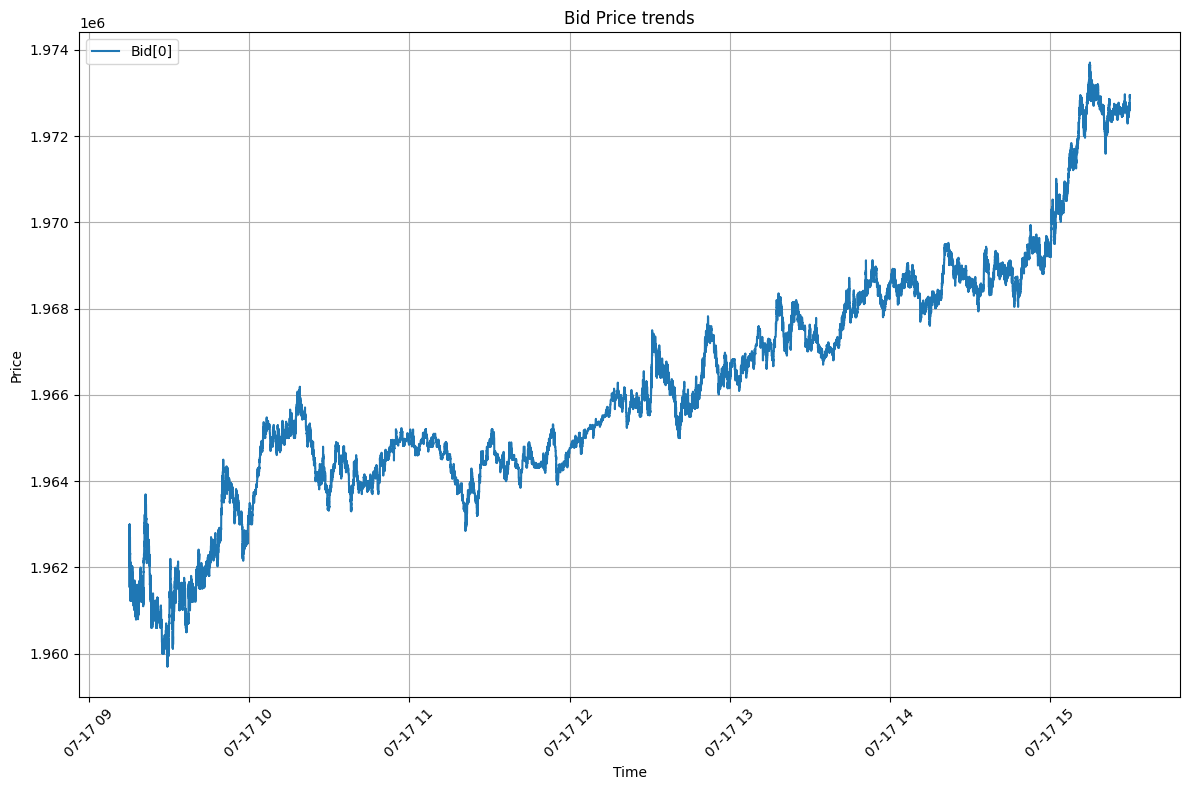

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(data['time'], data['bid[0]'], label='Bid[0]')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bid Price trends')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
'''The data is highly trendy and overall the prices are increasing over the years.
The data is also higly noisy as it is 30ms tick data.'''

'The data is highly trendy and overall the prices are increasing over the years.\nThe data is also higly noisy as it is 30ms tick data.'

Calculating Spread and Analyzing

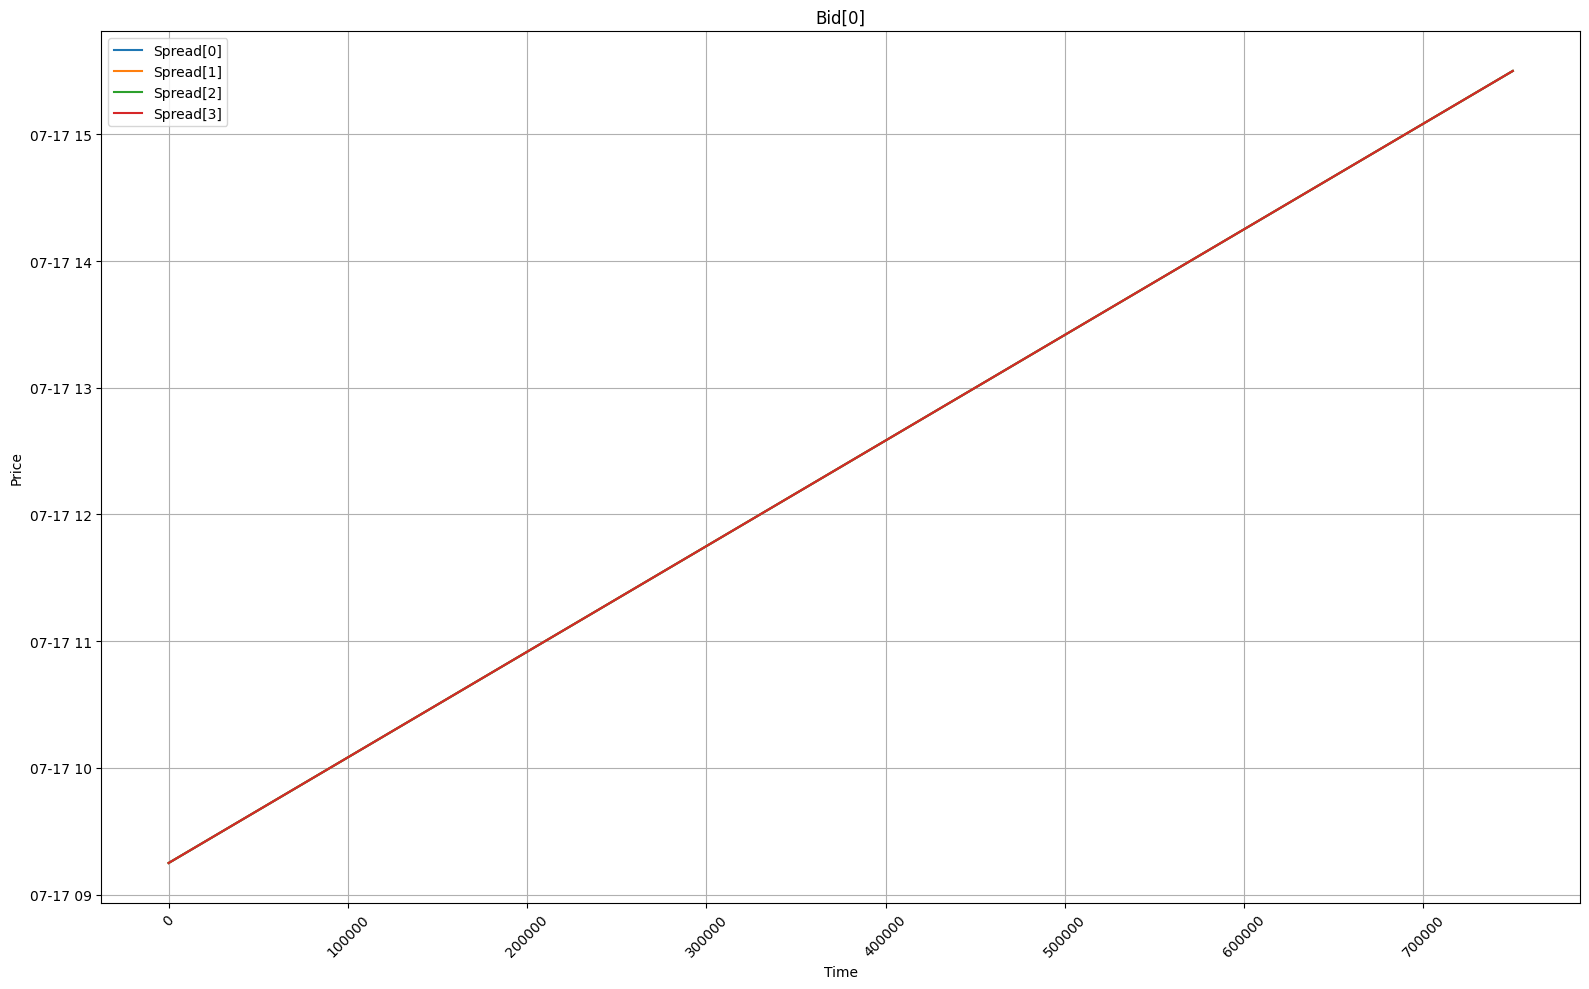

In [13]:
data['Spread[0]'] = data['ask[0]'] - data['bid[0]']
data['Spread[1]'] = data['ask[1]'] - data['bid[1]']
data['Spread[2]'] = data['ask[2]'] - data['bid[2]']
data['Spread[3]'] = data['ask[3]'] - data['bid[3]']

plt.figure(figsize=(16, 10))
plt.plot(data['time'], data=['Spread[0]'], label='Spread[0]')
plt.plot(data['time'], data=['Spread[1]'], label='Spread[1]')
plt.plot(data['time'], data=['Spread[2]'], label='Spread[2]')
plt.plot(data['time'], data=['Spread[3]'], label='Spread[3]')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bid[0]')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
"""Spread is overall highly correlated to each other following trends. We can potentially use pairs trading for different depths."""

'Spread is overall highly correlated to each other following trends. We can potentially use pairs trading for different depths.'

TASK II

In [15]:
data['Market_Price'] = (data['ask[0]'] + data['bid[0]'])/2

Backtest Code



In [16]:
class Backtest:
    def __init__(self, data, signal,starting_cash=data['bid[0]'][0] * 10000):
        self.data = data
        self.starting_cash = starting_cash
        self.cash = starting_cash
        self.signal = signal
        self.position = 0
        self.trades = 0
        self.capital_values = [starting_cash]  
        self.transaction_cost = 0
        
    def buy(self, price):
        self.position = self.cash / price
        self.cash = 0
        self.trades += 1

    def sell(self, price):
        self.cash = self.position * price
        self.position = 0
        self.trades += 1

    def run(self):
        for i in range(len(self.data)):
            Signal = self.data[self.signal].iloc[i]
            Market_Price = self.data['Market_Price'].iloc[i]

            if not self.position and Signal == 1:
                self.buy(Market_Price)

            elif self.position and Signal == -1:
                self.sell(Market_Price)
            
            current_capital = self.cash + (self.position * Market_Price)
            self.capital_values.append(current_capital)

        if self.position:
            self.sell(self.data['Market_Price'].iloc[-1])

        return (self.cash, self.trades, self.capital_values)
    
    def transaction_cost_final(self):
        return self.trades * self.transaction_cost
    
def capital_record(capital):
    df = pd.DataFrame({'Capital': capital})
    df['time'] = data['time']
    df['time'] = pd.to_datetime(df['time'])
    return df

def plotgrapph(df):
    starting_cash = data['bid[0]'][0]
    plt.figure(figsize=(12, 8))
    plt.plot(df['time'], df['Capital'], label='Capital')
    plt.plot(data['time'], data['Market_Price'], label='Market Price')
    plt.axhline(y=starting_cash, color='red', linestyle='--', label='Initial Capital')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Trends')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def final_run(data, signal):
    starting_cash = data['bid[0]'][0]
    bt = Backtest(data, signal, starting_cash)
    final_capital, trades, capital_values = bt.run()

    print(f"Starting Capital: {starting_cash}")
    print(f"Final Capital: {final_capital}")
    print(f"Profit:" , final_capital - starting_cash)
    print(f"Profit%:" , (final_capital - starting_cash)/starting_cash * 100)
    print(f"Number of Trades: {trades}")
    # print(f"Transaction Cost: -{trades*20}")
    # print(f"Return: {(final_capital-(trades*20)-starting_cash)/starting_cash * 100}%")
    plotgrapph(capital_record(capital_values))


Strategies using Indicators

Exponential Moving Average (EMA) Crossover

In [17]:
"""We will be using Exponential Moving Average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points first. The EMA is more responsive to the latest price changes than the SMA is. The EMA is very popular in stock market trading applications."""

'We will be using Exponential Moving Average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points first. The EMA is more responsive to the latest price changes than the SMA is. The EMA is very popular in stock market trading applications.'

In [18]:
data['EMA_mp_long'] = data['Market_Price'].ewm(span=50, adjust=False).mean().apply(lambda x: "{:.1f}".format(x))
data['EMA_mp_short'] = data['Market_Price'].ewm(span=16, adjust=False).mean().apply(lambda x: "{:.1f}".format(x))
data['EMA_mp_signal'] = 0
EMA_long = (data['EMA_mp_short'] > data['EMA_mp_long']) & (data['EMA_mp_short'].shift() <= data['EMA_mp_long'].shift())
EMA_short = (data['EMA_mp_short'] < data['EMA_mp_long']) & (data['EMA_mp_short'].shift() >= data['EMA_mp_long'].shift())

data.loc[EMA_long, 'EMA_mp_signal'] = -1
data.loc[EMA_short, 'EMA_mp_signal'] = 1

data['EMA_mp_signal'].value_counts()

 0    739580
-1      5224
 1      5195
Name: EMA_mp_signal, dtype: int64

Moving Average Convergence/Divergence indicator

In [19]:
'''Moving Average Convergence/Divergence indicator is a momentum oscillator primarily used to trade trends.'''

'Moving Average Convergence/Divergence indicator is a momentum oscillator primarily used to trade trends.'

In [20]:
data['Signal_macd_cross'] = 0 # 1 for buy, -1 for sell, 0 for hold
def calculate_macd(data, fast_period=20, slow_period=100, signal_period=9):
    data['Market_Price_macd'] = data['Market_Price'].ewm(span=fast_period, min_periods=1, adjust=False).mean() - \
                        data['Market_Price'].ewm(span=slow_period, min_periods=1, adjust=False).mean()
    
    data['macd_signal'] = data['Market_Price_macd'].ewm(span=signal_period, min_periods=1, adjust=False).mean()

    data['mp_histogram'] = data['Market_Price_macd'] - data['macd_signal']

calculate_macd(data)

def generate_Signals_macd(data):
    
    buy_condition = (data['Market_Price_macd'] > data['macd_signal']) & \
                    (data['Market_Price_macd'].shift(1) <= data['macd_signal'].shift(1))

    data['Signal_macd_cross'] = 0  
    data.loc[buy_condition, 'Signal_macd_cross'] = -1 

    sell_condition = (data['Market_Price_macd'] < data['macd_signal']) & \
                    (data['Market_Price_macd'].shift(1) >= data['macd_signal'].shift(1))

    data.loc[sell_condition, 'Signal_macd_cross'] = 1  
generate_Signals_macd(data)
data['Signal_macd_cross'].value_counts()

 0    728149
 1     10925
-1     10925
Name: Signal_macd_cross, dtype: int64

Backtesting Strategies based on Indicators.

Starting Capital: 1961560.0
Final Capital: 2012231.4088674288
Profit: 50671.40886742878
Profit%: 2.5832199304343875
Number of Trades: 9994


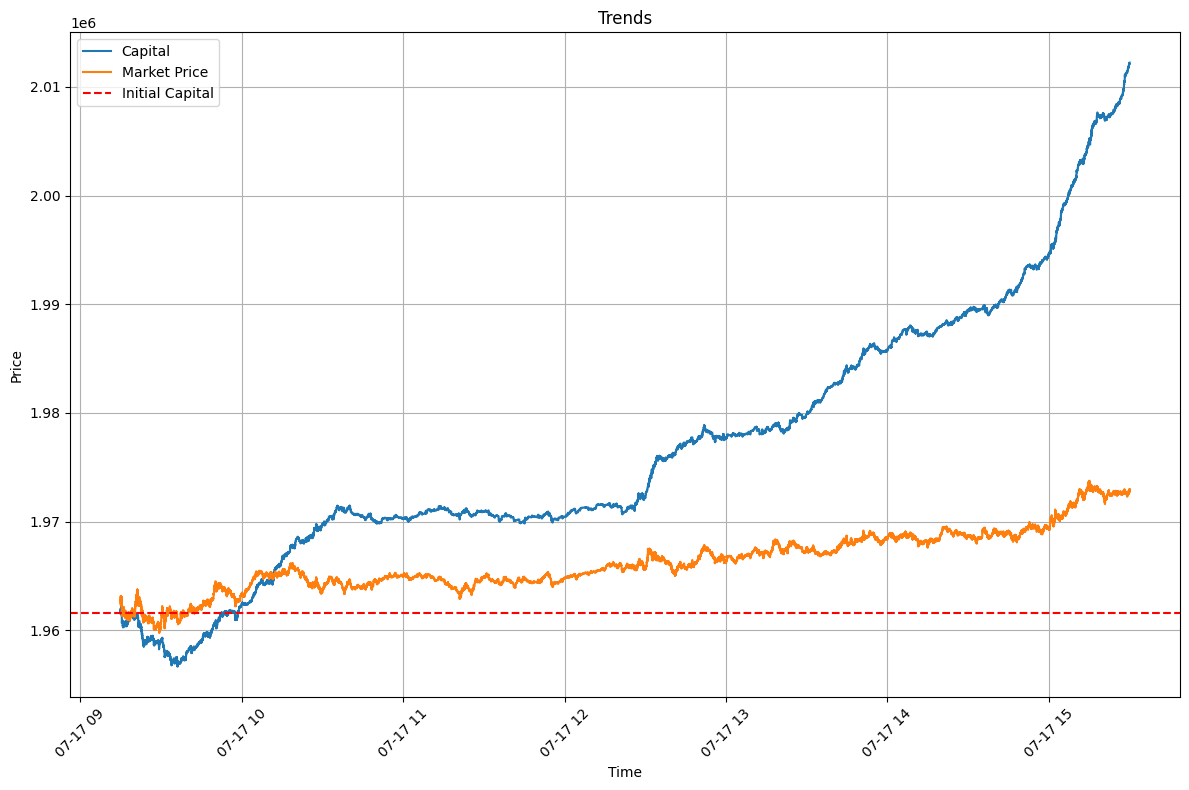

In [21]:
final_run(data, 'EMA_mp_signal')

Starting Capital: 1961560.0
Final Capital: 1991034.981865961
Profit: 29474.981865961105
Profit%: 1.5026296348804578
Number of Trades: 21850


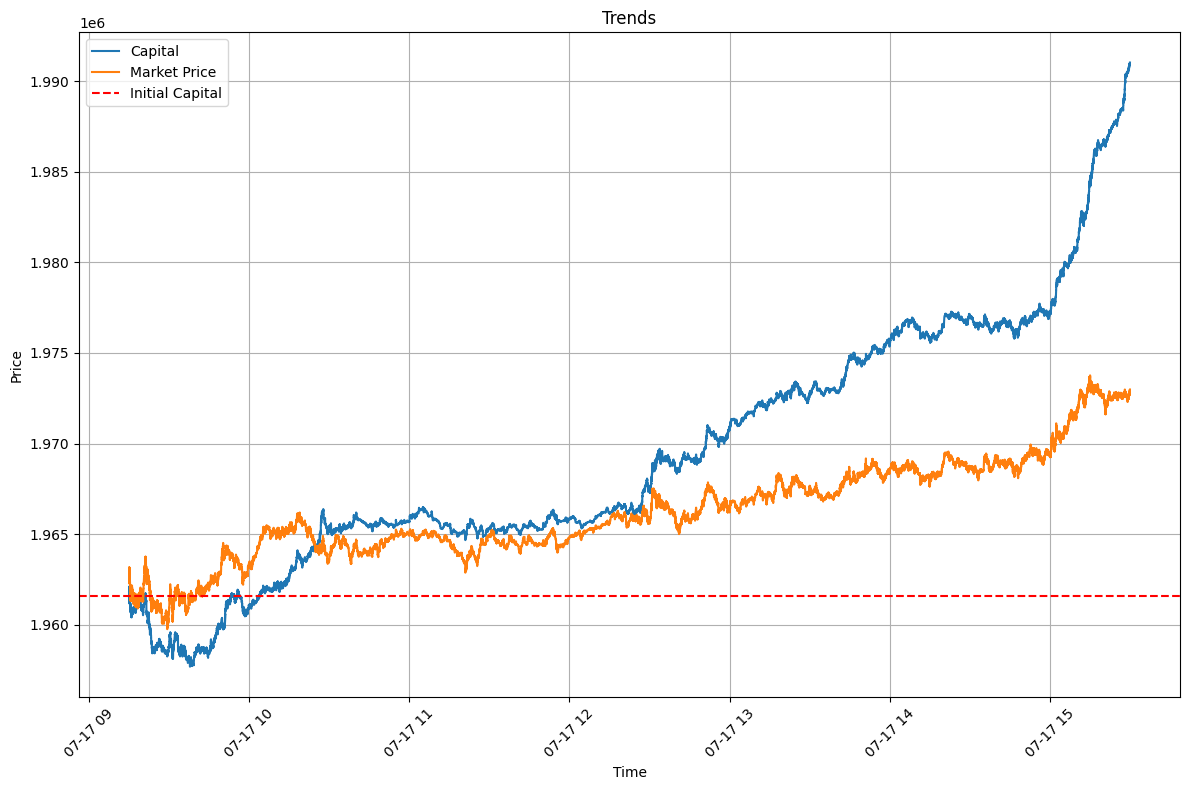

In [22]:
final_run(data, 'Signal_macd_cross')

Parameter Tuning


In [23]:
'''Parameter Tuning helps us choose the most optimum parameter for our model maximizing our returns.'''

'Parameter Tuning helps us choose the most optimum parameter for our model maximizing our returns.'

[3.6643041612645213, 3.6809258962550038, 3.664729806173999, 3.6724166673388394, 3.683108672825377, 3.7035219144421943, 3.694287104037851, 3.6663145730596836, 3.676422422742096, 3.6682764626174134]
205


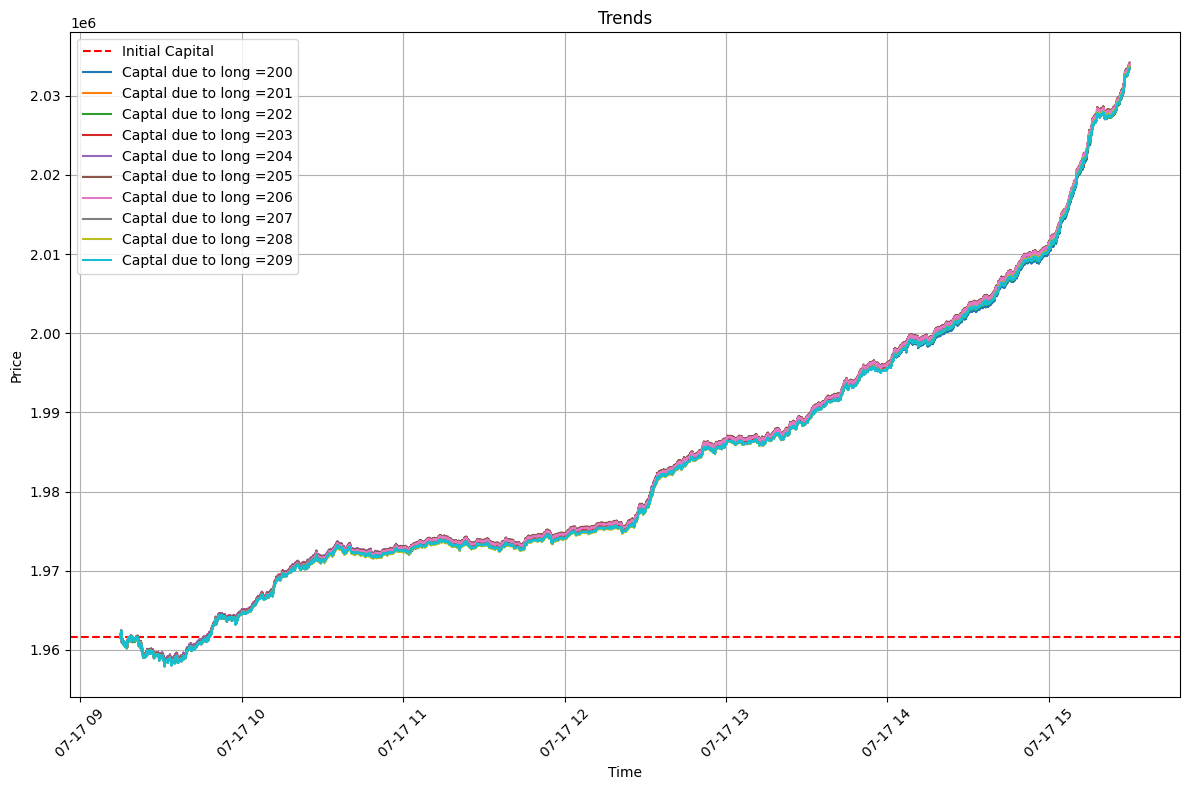

In [25]:
'''Hypothesis: Since Data given is very noisy, higher sensitivity for short EMA is required for booking larger profits over long terms.
Null Hypothesis: Higher Sensitivity for short EMA is not required.'''

#EMA Cross
optim_param_ema = []
data_ema = data.copy()
x = [i for i in range(200,210)]
profit = []
starting_cash = data_ema['bid[0]'][0]
plt.figure(figsize=(12, 8))
# plt.plot(data_ema['time'], data_ema['Market_Price'], label='Market Price')
plt.axhline(y=starting_cash, color='red', linestyle='--', label='Initial Capital')


for i in range(len(x)):
    long_period = x[i]
    data_ema[f'EMA_mp_signal{i}'] = 0
    data_ema[f'EMA_mp_long{i}'] = data_ema['Market_Price'].ewm(span=long_period, adjust=False).mean()
    data_ema[f'EMA_mp_short{i}'] = data_ema['Market_Price'].ewm(span=1, adjust=False).mean()
    EMA_long = (data_ema[f'EMA_mp_short{i}'] > data_ema[f'EMA_mp_long{i}']) & (data_ema[f'EMA_mp_short{i}'].shift() <= data_ema[f'EMA_mp_long{i}'].shift())
    EMA_short = (data_ema[f'EMA_mp_short{i}'] < data_ema[f'EMA_mp_long{i}']) & (data_ema[f'EMA_mp_short{i}'].shift() >= data_ema[f'EMA_mp_long{i}'].shift())

    data_ema.loc[EMA_long, f'EMA_mp_signal{i}'] = -1
    data_ema.loc[EMA_short, f'EMA_mp_signal{i}'] = 1
    bt = Backtest(data_ema, f'EMA_mp_signal{i}', starting_cash)
    final_capital, trades, capital_values = bt.run()
    profit.append(((final_capital-starting_cash)/starting_cash*100))
    
    plt.plot(capital_record(capital_values)['time'], capital_record(capital_values)['Capital'], label=f'Captal due to long ={x[i]}')

print(profit)
print(x[profit.index(max(profit))])
optim_param_ema.append(x[profit.index(max(profit))])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Trends')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
    


[3.6643041612645213, 3.5769246163019353, 3.5233641298990253, 3.3982241881679816, 3.2532356434690213, 3.1480164306784526, 3.0786346866760224, 2.9732943907574083, 2.887571701664287, 2.774203373543267, 2.689032555672396, 2.6878508268556893, 2.658807075014937, 2.620995033329882]
1


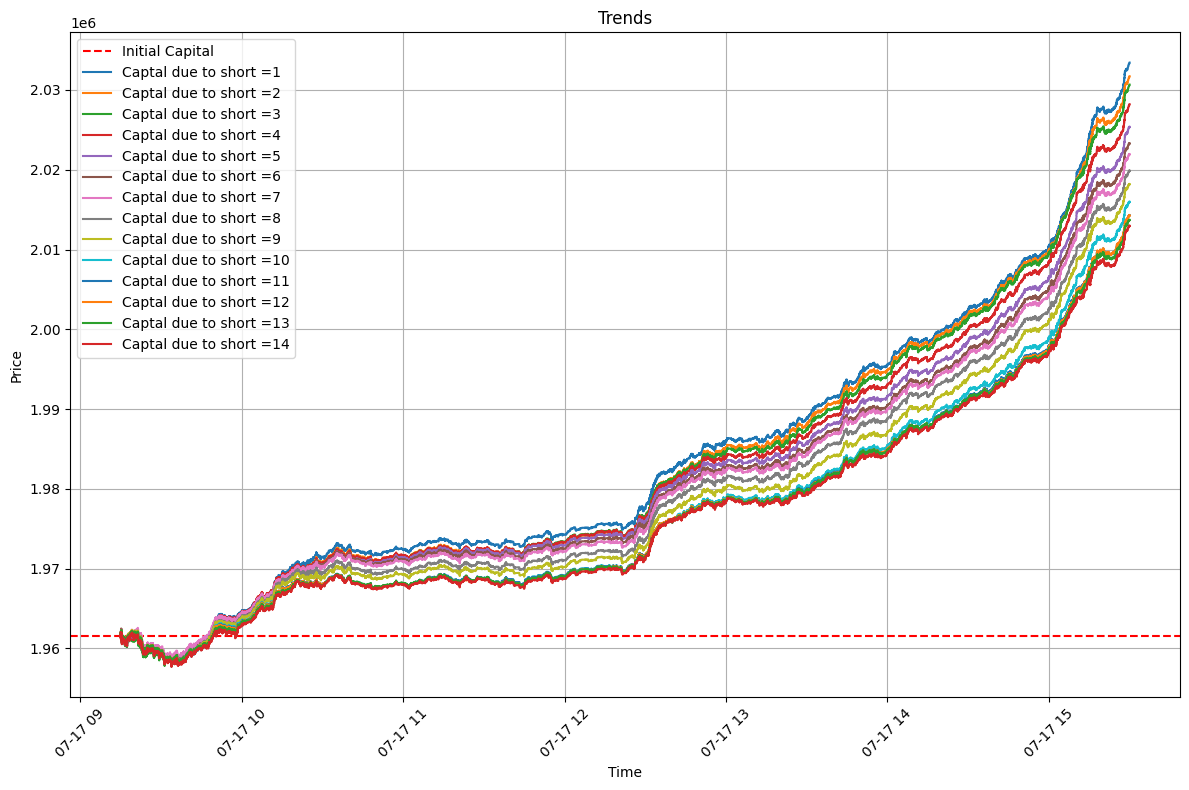

In [26]:
x = [i for i in range(1,15)]
profit = []
starting_cash = data_ema['bid[0]'][0]
plt.figure(figsize=(12, 8))
# plt.plot(data_ema['time'], data_ema['Market_Price'], label='Market Price')
plt.axhline(y=starting_cash, color='red', linestyle='--', label='Initial Capital')


for i in range(len(x)):
    short_period = x[i]
    data_ema[f'EMA_mp_signal{i}'] = 0
    data_ema[f'EMA_mp_long{i}'] = data_ema['Market_Price'].ewm(span=200, adjust=False).mean()
    data_ema[f'EMA_mp_short{i}'] = data_ema['Market_Price'].ewm(span=short_period, adjust=False).mean()
    EMA_long = (data_ema[f'EMA_mp_short{i}'] > data_ema[f'EMA_mp_long{i}']) & (data_ema[f'EMA_mp_short{i}'].shift() <= data_ema[f'EMA_mp_long{i}'].shift())
    EMA_short = (data_ema[f'EMA_mp_short{i}'] < data_ema[f'EMA_mp_long{i}']) & (data_ema[f'EMA_mp_short{i}'].shift() >= data_ema[f'EMA_mp_long{i}'].shift())

    data_ema.loc[EMA_long, f'EMA_mp_signal{i}'] = -1
    data_ema.loc[EMA_short, f'EMA_mp_signal{i}'] = 1
    bt = Backtest(data_ema, f'EMA_mp_signal{i}', starting_cash)
    final_capital, trades, capital_values = bt.run()
    profit.append(((final_capital-starting_cash)/starting_cash*100))
    
    plt.plot(capital_record(capital_values)['time'], capital_record(capital_values)['Capital'], label=f'Captal due to short ={x[i]}')

print(profit)
print(x[profit.index(max(profit))])
optim_param_ema.append(x[profit.index(max(profit))])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Trends')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Starting Capital: 1961560.0
Final Capital: 2034033.6297875177
Profit: 72473.62978751771
Profit%: 3.69469349841543
Number of Trades: 8446


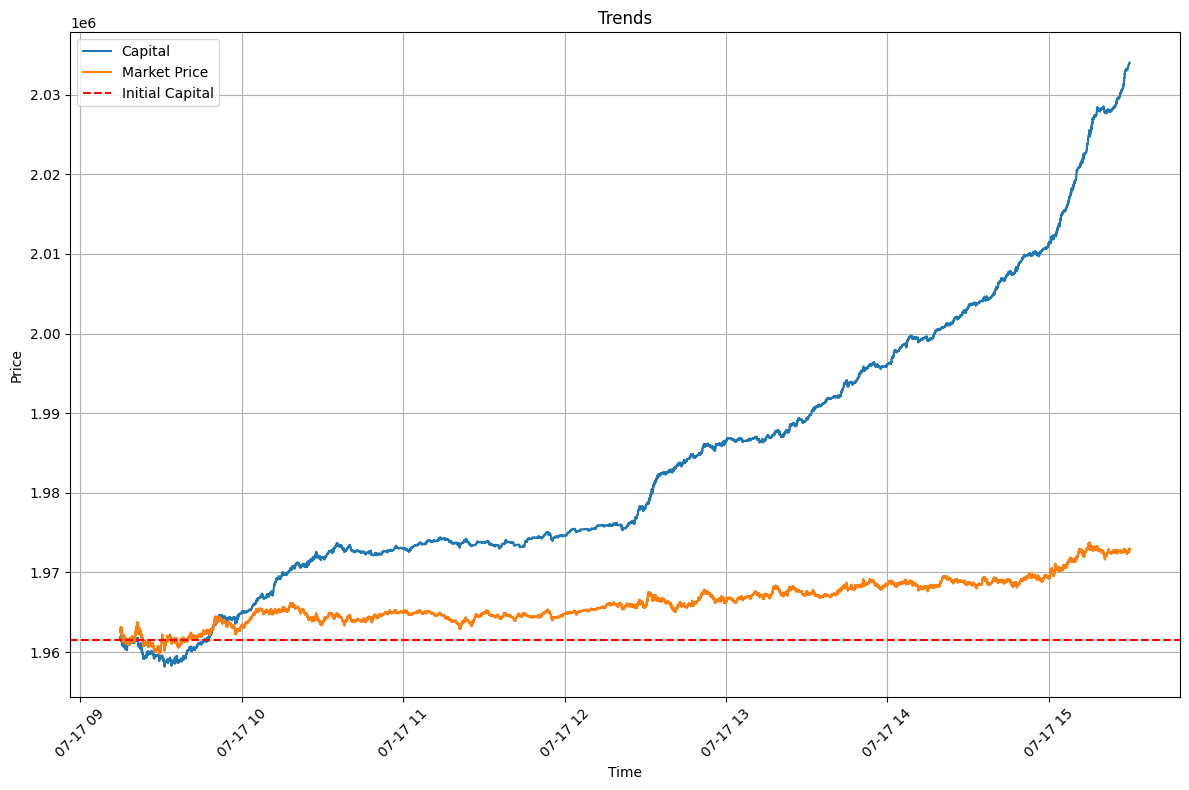

In [27]:
optim_param_ema = [205,1]
data['EMA_mp_long'] = data['Market_Price'].ewm(span=optim_param_ema[0], adjust=False).mean().apply(lambda x: "{:.1f}".format(x))
data['EMA_mp_short'] = data['Market_Price'].ewm(span=optim_param_ema[1], adjust=False).mean().apply(lambda x: "{:.1f}".format(x))
data['EMA_mp_signal'] = 0
EMA_long = (data['EMA_mp_short'] > data['EMA_mp_long']) & (data['EMA_mp_short'].shift() <= data['EMA_mp_long'].shift())
EMA_short = (data['EMA_mp_short'] < data['EMA_mp_long']) & (data['EMA_mp_short'].shift() >= data['EMA_mp_long'].shift())

data.loc[EMA_long, 'EMA_mp_signal'] = -1
data.loc[EMA_short, 'EMA_mp_signal'] = 1

data['EMA_mp_signal'].value_counts()

final_run(data, 'EMA_mp_signal')

MACD Parameter Optimization


In [28]:
data_macd = data.copy()

[0.0, 3.3798830666129995, 3.3427726749349387, 3.2409859894892965, 3.192396198595668]


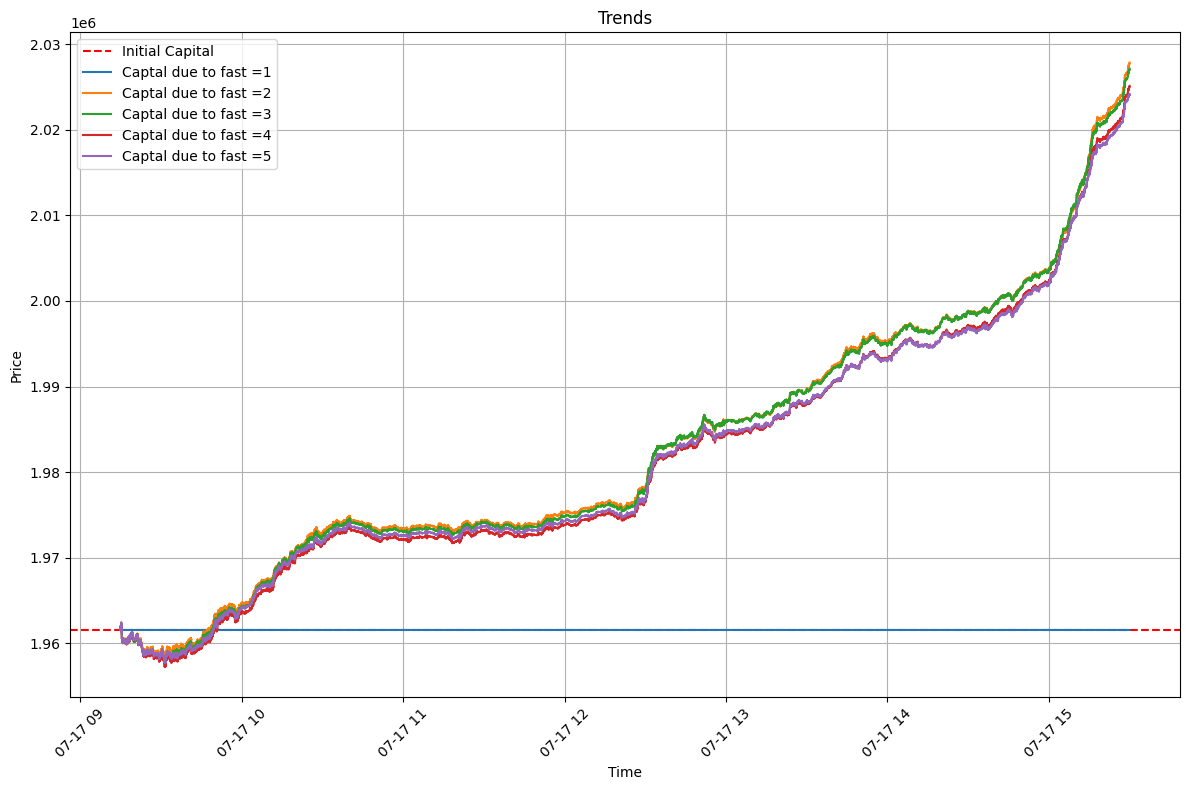

2


In [29]:
y = [i for i in range(1,6)]
optim_param_macd = []
profit = []
starting_cash = data_ema['bid[0]'][0]
plt.figure(figsize=(12, 8))
# plt.plot(data_ema['time'], data_ema['Market_Price'], label='Market Price')
plt.axhline(y=starting_cash, color='red', linestyle='--', label='Initial Capital')

for i in range(len(y)):
    data_macd[f'Signal_macd_cross{i}'] = 0 # 1 for buy, -1 for sell, 0 for hold
    fast_period = 86
    slow_period = 400
    signal_period = y[i]
    data_macd[f'Market_Price_macd{i}'] = data_macd['Market_Price'].ewm(span=fast_period, min_periods=1, adjust=False).mean() - \
                        data_macd['Market_Price'].ewm(span=slow_period, min_periods=1, adjust=False).mean()
    
    data_macd[f'macd_signal{i}'] = data_macd[f'Market_Price_macd{i}'].ewm(span=signal_period, min_periods=1, adjust=False).mean()

    data_macd[f'mp_histogram{i}'] = data_macd[f'Market_Price_macd{i}'] - data_macd[f'macd_signal{i}']
    
    buy_condition = (data_macd[f'Market_Price_macd{i}'] > data_macd[f'macd_signal{i}']) & \
                (data_macd[f'Market_Price_macd{i}'].shift(1) <= data_macd[f'macd_signal{i}'].shift(1))

    data_macd[f'Signal_macd_cross{i}'] = 0  
    data_macd.loc[buy_condition, f'Signal_macd_cross{i}'] = -1  #  1 for buy signals
    sell_condition = (data_macd[f'Market_Price_macd{i}'] < data_macd[f'macd_signal{i}']) & \
                    (data_macd[f'Market_Price_macd{i}'].shift(1) >= data_macd[f'macd_signal{i}'].shift(1))

    data_macd.loc[sell_condition, f'Signal_macd_cross{i}'] = 1  #  -1 for sell signals
    bt = Backtest(data_macd, f'Signal_macd_cross{i}', starting_cash)
    final_capital, trades, capital_values = bt.run()
    profit.append(((final_capital-starting_cash)/starting_cash*100))
    
    plt.plot(capital_record(capital_values)['time'], capital_record(capital_values)['Capital'], label=f'Captal due to fast ={y[i]}')

print(profit)

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Trends')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print(y[profit.index(max(profit))])
optim_param_macd.append(y[profit.index(max(profit))])

Starting Capital: 1961560.0
Final Capital: 2027858.434281454
Profit: 66298.43428145396
Profit%: 3.3798830666129995
Number of Trades: 14616


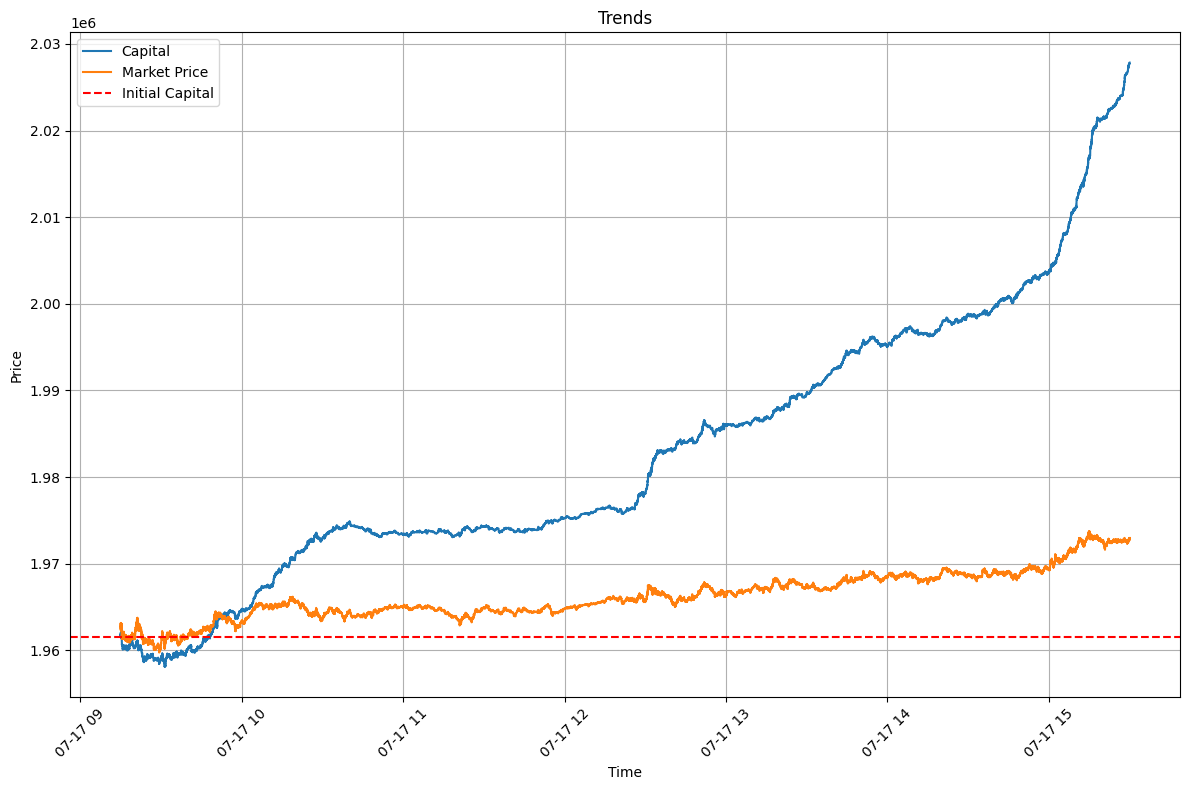

In [30]:
optim_params_macd = [86,400,2]
data['Signal_macd_cross'] = 0 # 1 for buy, -1 for sell, 0 for hold
def calculate_macd(data, fast_period=optim_params_macd[0], slow_period=optim_params_macd[1], signal_period=optim_params_macd[2]):
    data['Market_Price_macd'] = data['Market_Price'].ewm(span=fast_period, min_periods=1, adjust=False).mean() - \
                        data['Market_Price'].ewm(span=slow_period, min_periods=1, adjust=False).mean()
    
    data['macd_signal'] = data['Market_Price_macd'].ewm(span=signal_period, min_periods=1, adjust=False).mean()

    data['mp_histogram'] = data['Market_Price_macd'] - data['macd_signal']

calculate_macd(data)

buy_condition = (data['Market_Price_macd'] > data['macd_signal']) & \
                (data['Market_Price_macd'].shift(1) <= data['macd_signal'].shift(1))

data['Signal_macd_cross'] = 0  # Initialize the signal column with 0s
data.loc[buy_condition, 'Signal_macd_cross'] = -1  # Assign 1 for buy signals

# Generate the sell signals
sell_condition = (data['Market_Price_macd'] < data['macd_signal']) & \
                 (data['Market_Price_macd'].shift(1) >= data['macd_signal'].shift(1))

data.loc[sell_condition, 'Signal_macd_cross'] = 1  # Assign -1 for sell signals

final_run(data, 'Signal_macd_cross')

In [31]:
'''Data analysis shows short trends require the least amount of period to perform well. Hence we reject the Null Hypothesis and accept the Hypothesis.'''

'Data analysis shows short trends require the least amount of period to perform well. Hence we reject the Null Hypothesis and accept the Hypothesis.'

Final Comparison of both Indicators.

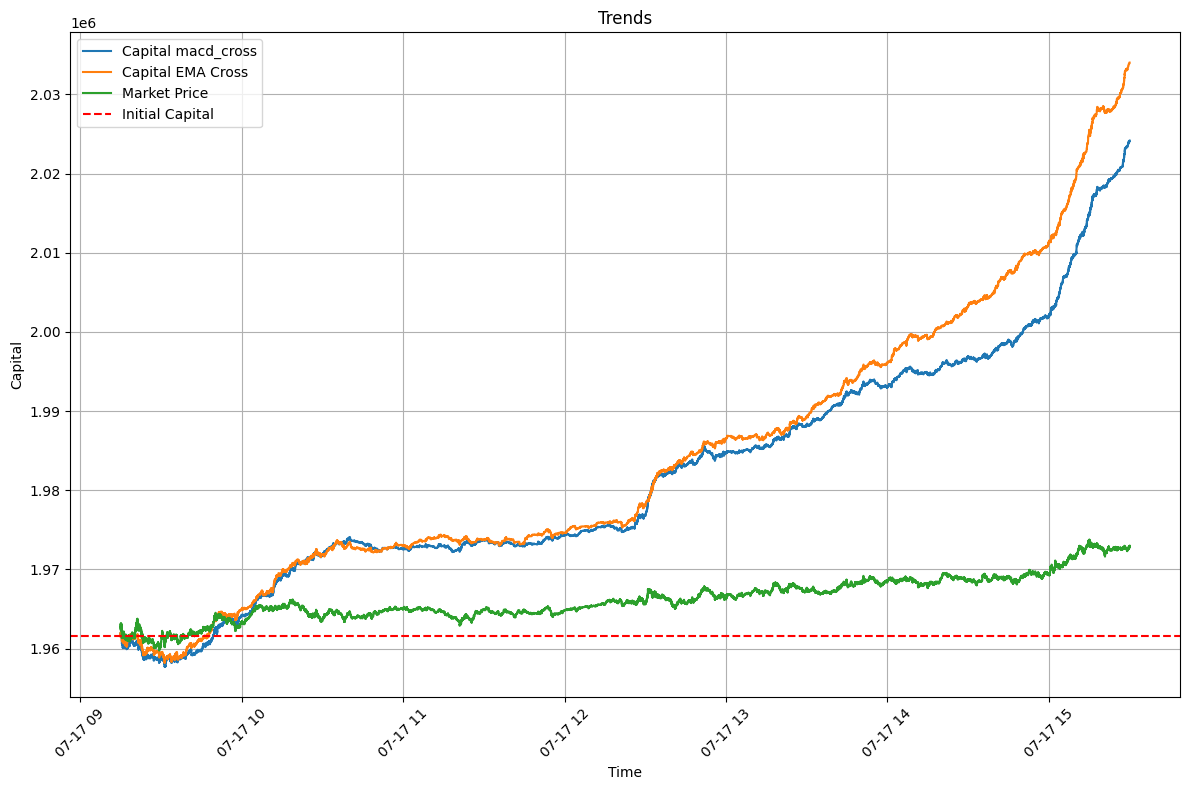

In [32]:
starting_cash = data['bid[0]'][0]
bt1 = Backtest(data, f'Signal_macd_cross', starting_cash)
final_capital1, trades1, capital_values1 = bt1.run()

bt2 = Backtest(data, f'EMA_mp_signal', starting_cash)
final_capital2, trades2, capital_values2 = bt2.run()

plt.figure(figsize=(12, 8))
plt.plot(capital_record(capital_values1)['time'], capital_record(capital_values)['Capital'], label=f'Capital macd_cross')
plt.plot(capital_record(capital_values2)['time'], capital_record(capital_values2)['Capital'], label=f'Capital EMA Cross')
plt.plot(data['time'], data['Market_Price'], label='Market Price')
plt.axhline(y=data['bid[0]'][0], color='red', linestyle='--', label='Initial Capital')
plt.xlabel('Time')
plt.ylabel('Capital')
plt.title('Trends')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
'''I failed to take volume into account along with indicators thats why the profit is fairly low.'''

'I failed to take volume into account along with indicators thats why the profit is fairly low.'